In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_train['Age']

C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/4283047746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['Age']
C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/4283047746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'] = X_train['Age']


In [8]:
X_train.head()

,Age,Fare,Age_imputed
670,40.0,39.0000,40.0
545,64.0,26.0000,64.0
770,24.0,9.5000,24.0
207,26.0,18.7875,26.0
247,24.0,14.5000,24.0


In [9]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

C:\Users\baibh\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
X_train['Age'].isnull().sum()

139

In [11]:
X_train['Age_imputed'].isnull().sum()

0

In [12]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull().sum()] = X_test["Age"].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\baibh\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/80438892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'][X_test['Age_imputed'].isnull().sum()] = X_test["Age"].dropna().sample(X_test['Age'].isnull().sum()).values


In [13]:
X_test['Age'].isnull().sum()

38

In [14]:
X_test['Age_imputed'].isnull().sum()

179

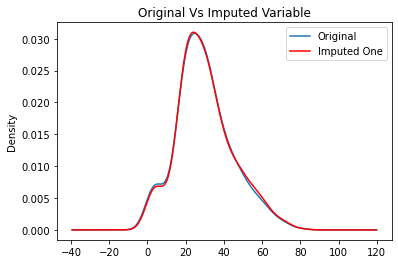

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax = ax)

#the imputed one variable

X_train['Age_imputed'].plot(kind='kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original', "Imputed One"]
# Locating the legend

ax.legend(lines, labels, loc = 'best')
plt.title('Original Vs Imputed Variable')
plt.show()

In [16]:
print('The original variance is', X_train['Age'].var())
print('The imputed variance is', X_train['Age_imputed'].var())

The original variance is 213.53695992994778
The imputed variance is 216.94565834459283


In [17]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2776.173262,83.78127,76.888423
Age,83.781270,213.53696,213.536960
Age_imputed,76.888423,213.53696,216.945658


Outliers are not impacted with the imputation of missing values of random numbers

In [18]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [22]:
X_in = data
y_in = data['SalePrice']

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_in, y_in, test_size = 0.2)

In [24]:
X_train1['GarageQual_imputed'] = X_train1['GarageQual']
X_test1['GarageQual_imputed'] = X_test1['GarageQual']

X_train1['FireplaceQu_imputed'] = X_train1['FireplaceQu']
X_test1['FireplaceQu_imputed'] = X_test1['FireplaceQu']

C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/3901612977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1['GarageQual_imputed'] = X_train1['GarageQual']
C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/3901612977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test1['GarageQual_imputed'] = X_test1['GarageQual']
C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/3901612977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [25]:
X_train1.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
85,TA,TA,260000,TA,TA
831,NaN,TA,151000,TA,NaN
730,TA,TA,236500,TA,TA
542,TA,TA,213250,TA,TA
1343,TA,Fa,177000,Fa,TA


In [26]:
X_train1['GarageQual_imputed'][X_train1['GarageQual_imputed'].isnull()] = X_train1['GarageQual'].dropna().sample(X_train1['GarageQual'].isnull().sum()).values

C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/4107028346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1['GarageQual_imputed'][X_train1['GarageQual_imputed'].isnull()] = X_train1['GarageQual'].dropna().sample(X_train1['GarageQual'].isnull().sum()).values
C:\Users\baibh\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
X_train1['GarageQual'].isnull().sum(), X_train1['GarageQual_imputed'].isnull().sum()

(67, 0)

In [28]:
temp = pd.concat([
    X_train1['GarageQual'].value_counts()/len(X_train1['GarageQual'].dropna()),
    X_train1['GarageQual_imputed'].value_counts()/ len(X_train1)
], axis = 1)
temp.columns = ['Original', 'Imputed']

In [29]:
temp.head()

,Original,Imputed
TA,0.954587,0.955479
Fa,0.035422,0.034247
Gd,0.007266,0.007705
Ex,0.001817,0.001712
Po,0.000908,0.000856


In [30]:
X_train1['FireplaceQu_imputed'][X_train1['FireplaceQu'].isnull()] = X_train1['FireplaceQu'].dropna().sample(X_train1['FireplaceQu'].isnull().sum()).values

C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/835509553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1['FireplaceQu_imputed'][X_train1['FireplaceQu'].isnull()] = X_train1['FireplaceQu'].dropna().sample(X_train1['FireplaceQu'].isnull().sum()).values
C:\Users\baibh\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
temp1 = pd.concat([
    X_train1['FireplaceQu'].value_counts()/len(X_train1['FireplaceQu'].dropna()),
    X_train1['FireplaceQu_imputed'].value_counts()/len(X_train1)
    
], axis = 1)
temp1.columns = ['Original', 'Imputed']

In [32]:
temp1.head()

,Original,Imputed
Gd,0.4816,0.481164
TA,0.4192,0.417808
Fa,0.0368,0.039384
Ex,0.0336,0.032534
Po,0.0288,0.029110


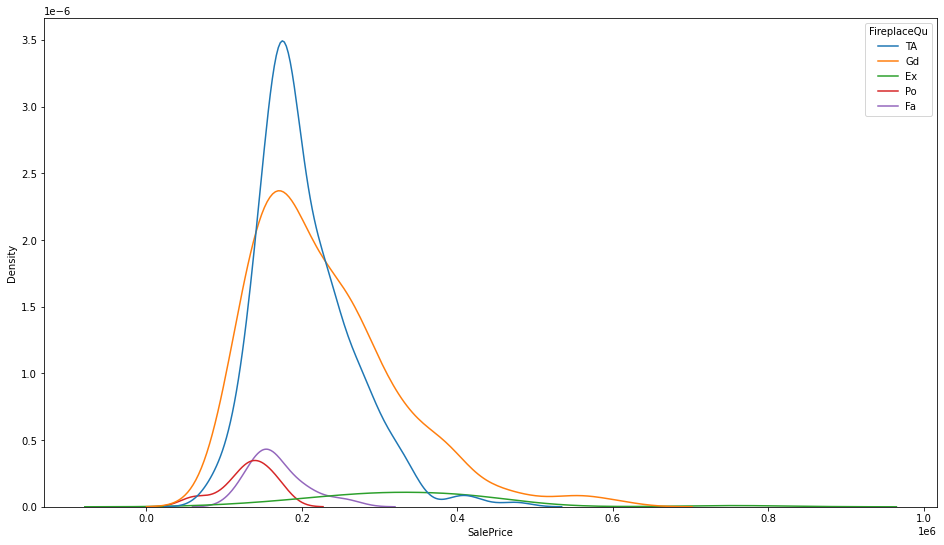

In [33]:
plt.figure(figsize = (16, 9))
sns.kdeplot(X_train1['SalePrice'], hue = X_train1['FireplaceQu'])

plt.show()

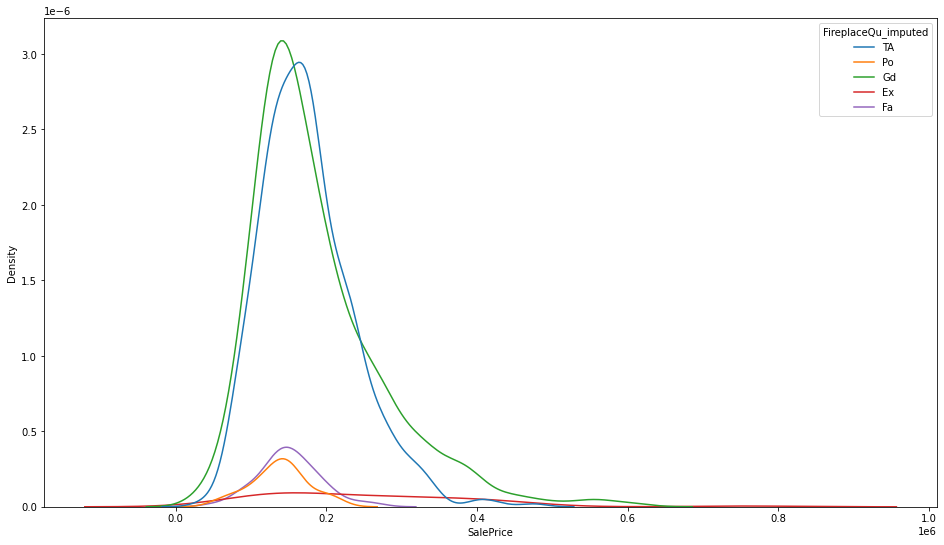

In [34]:
plt.figure(figsize = (16, 9))
sns.kdeplot(X_train1['SalePrice'], hue = X_train1['FireplaceQu_imputed'])

plt.show()

# Missing Value Indicator

In [35]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [36]:
X2 = df.drop(columns=['Survived'])
y2 = df['Survived']

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 2)

In [38]:
from sklearn.impute import SimpleImputer

si = SimpleImputer()

In [39]:
X_train2_trf = si.fit_transform(X_train2)
X_test2_trf = si.transform(X_test2)

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train2_trf, y_train)

y_pred = clf.predict(X_test2_trf)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6033519553072626

In [42]:
from sklearn.impute import MissingIndicator

mi = MissingIndicator()
mi.fit(X_train2)

MissingIndicator()

In [43]:
mi.features_

array([0], dtype=int64)

In [44]:
X_train_missing = mi.transform(X_train2)

In [45]:
X_test_missing = mi.transform(X_test2)

In [46]:
X_train2['Age_na'] = X_train_missing

X_test2['Age_na'] = X_test_missing

C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/3206153024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train2['Age_na'] = X_train_missing
C:\Users\baibh\AppData\Local\Temp/ipykernel_10580/3206153024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test2['Age_na'] = X_test_missing


In [47]:
X_train2.head()

,Age,Fare,Age_na
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False


In [48]:
X_train_trf2 = si.fit_transform(X_train2)
X_test_trf2 = si.transform(X_test2)

In [49]:
clf.fit(X_train_trf2, y_train)

LogisticRegression()

In [50]:
y_pred = clf.predict(X_test_trf2)

accuracy_score(y_test, y_pred)

0.6033519553072626

# Directly using simple imputer class

In [52]:
si = SimpleImputer(add_indicator = True)

X_train2 = si.fit_transform(X_train2)
X_test2  = si.transform(X_test2)

clf.fit(X_train_trf2, y_train)

y_pred3 = clf.predict(X_test_trf2)

accuracy_score(y_test, y_pred3)

0.6033519553072626